In [22]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
from pandas import DataFrame
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import operator
import torchvision.transforms as transforms
import os
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader

from sklearn.cluster import KMeans
from itertools import chain
import mahotas as mt
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import M1 as M1


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix


In [23]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


# Loading the Dataset

In [24]:
file_path = 'C:/Users/Joe/Desktop/UNI/Yr3/Dissertation/Datasets/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(file_path))]

print(len(folder_names))  # 102 = 101 categories + background


100


In [25]:
file_path = 'C:/Users/Joe/Desktop/UNI/Yr3/Dissertation/Datasets/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(file_path))]

img_data = []
img_classes = []

num_categories = 8
num_imgs = 30
selected_categories = np.random.randint(0, 101, num_categories, dtype="I")

for a, cat in enumerate(selected_categories):
    folder_path = file_path + '/' + folder_names[cat]
    image_names = [a for a in sorted(
        os.listdir(folder_path))]

    for b, img_name in enumerate(image_names):
        img_classes.append(folder_names[cat])
        img_path = folder_path + '/' + img_name
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))

        if img is not None:
            img_data.append(img)


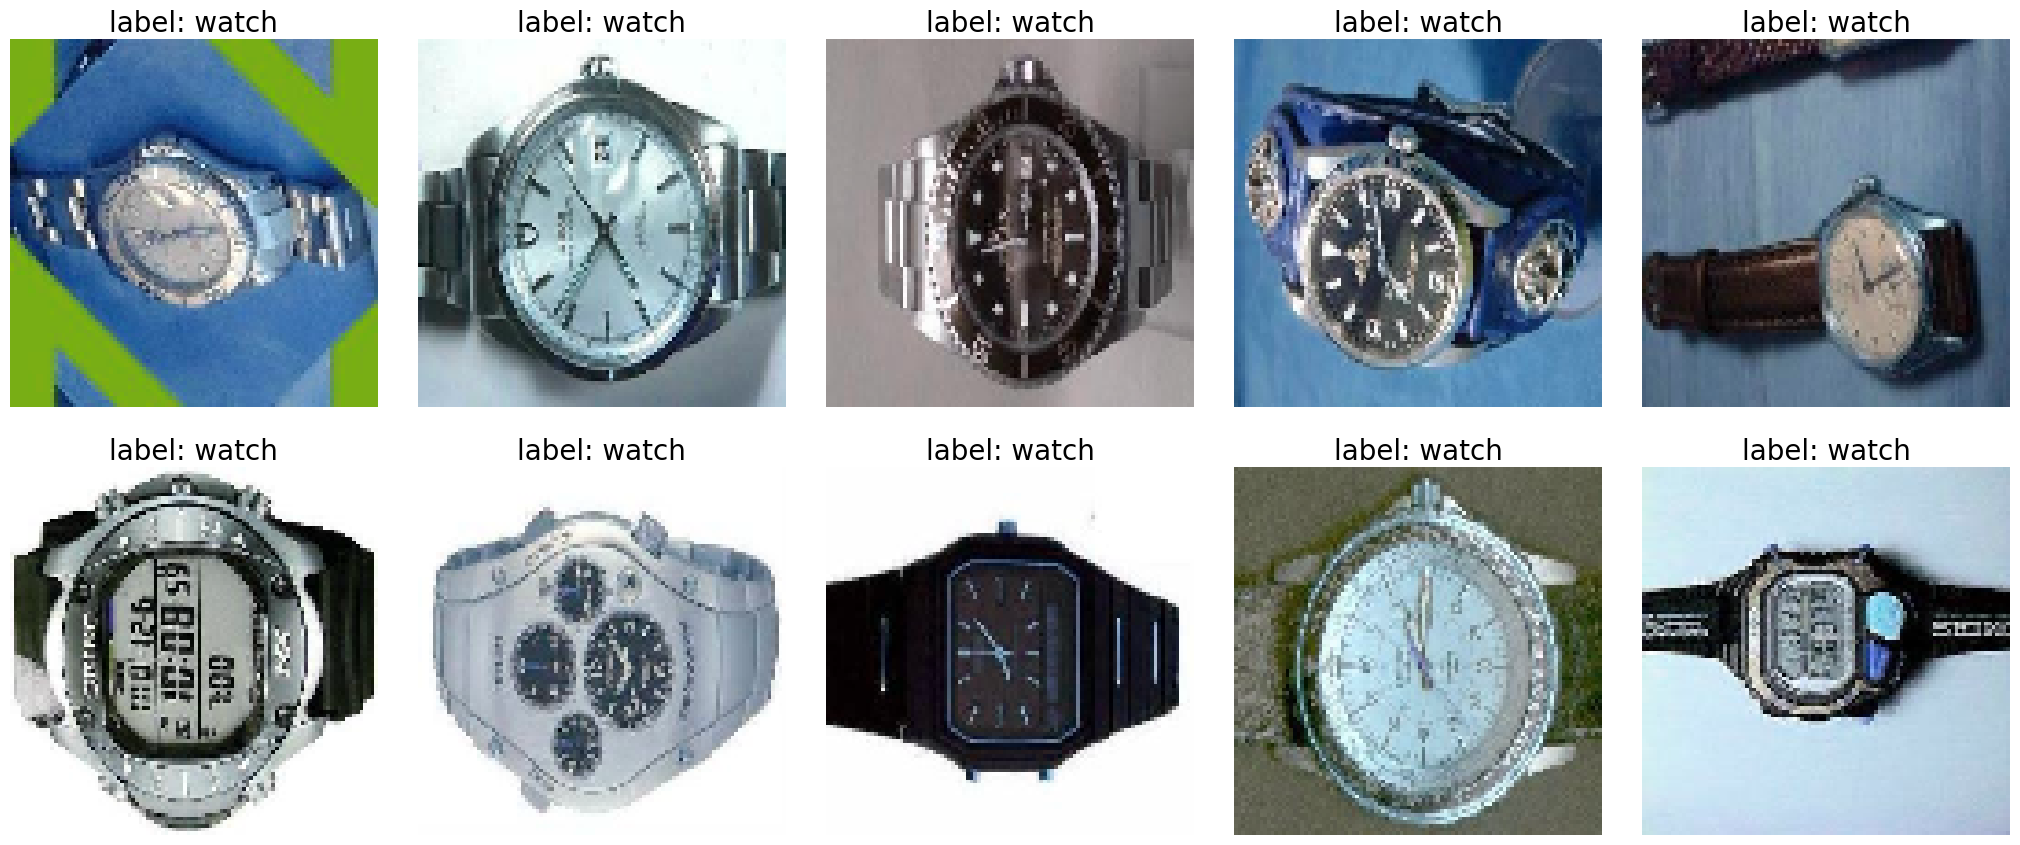

In [26]:
indxs = np.arange(165, 176, 1)
fig, axs = plt.subplots(2, 5,figsize = (20,8))
fig.subplots_adjust(hspace=0.15,wspace=0.11, left=0,right=1,bottom=0, top=1)
im = 0

for y in range(axs.shape[0]):
    for x in range(axs.shape[1]):
        axs[y][x].imshow(img_data[indxs[im]])
        axs[y][x].set_title("label: {}".format(img_classes[indxs[im]]), fontsize=20.0)
        axs[y][x].axis('off')
        im += 1


In [128]:
file_path = 'C:/Users/Joe/Desktop/UNI/Yr3/Dissertation/Datasets/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(file_path))]
num_categories = 8
num_imgs = 30
DS_num = 3
report_data = []
report_classes = []

for ds in range(DS_num):
    img_data = []
    img_classes = []

    selected_categories = np.random.randint(0, 101, num_categories, dtype="I")

    for a, cat in enumerate(selected_categories):
        folder_path = file_path + '/' + folder_names[cat]
        image_names = [a for a in sorted(
            os.listdir(folder_path))]

        for b, img_name in enumerate(image_names):
            img_classes.append(folder_names[cat])
            img_path = folder_path + '/' + img_name
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))

            if img is not None:
                img_data.append(img)
    report_data.append(img_data)
    report_classes.append(img_classes)


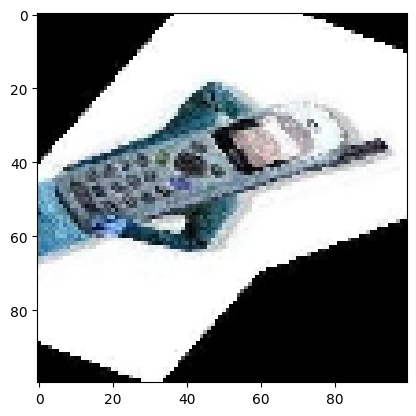

In [28]:
plt.imshow(report_data[0][292])


In [29]:
DS_num = 0
query_img = report_data[DS_num][292]
test_m1 = M1.model_compute(query_img, report_data[DS_num])
m1_indexs = list(test_m1.keys())
m1_dists = list(test_m1.values())


Text(0.5, 1.0, 'Query Image \n Label:cellphone')

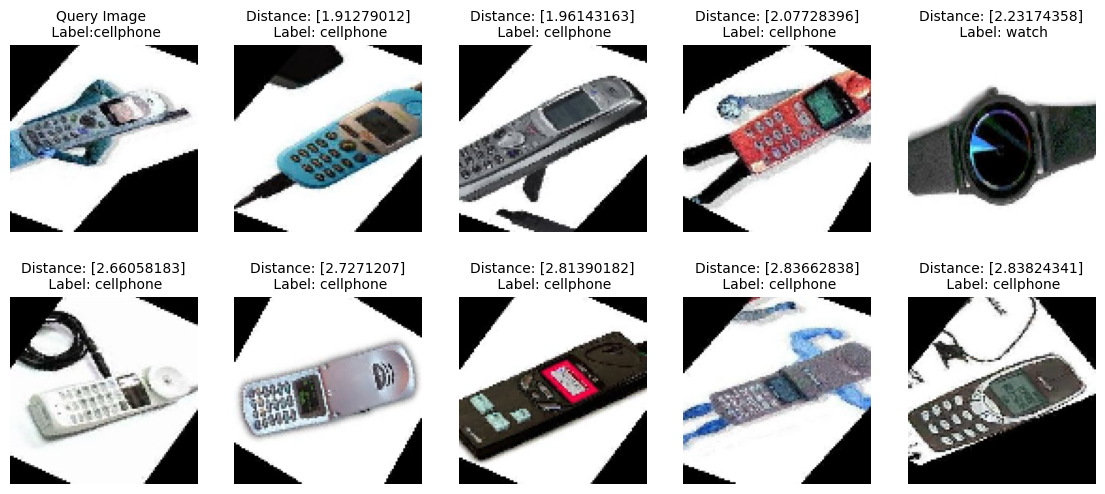

In [30]:
fig, ax_arr = plt.subplots(2, 5, figsize=(14, 6))

for a in range(ax_arr.shape[1]):
    ax_arr[0][a].imshow(report_data[DS_num][m1_indexs[a]])
    ax_arr[0][a].set_title('Distance: {}\n Label: {}'.format(
        m1_dists[a], report_classes[DS_num][m1_indexs[a]]), fontsize=10)
    ax_arr[0][a].axis('off')

for a in range(ax_arr.shape[1]):
    ax_arr[1][a].imshow(report_data[DS_num][m1_indexs[a+5]])
    ax_arr[1][a].set_title('Distance: {}\n Label: {}'.format(
        m1_dists[a+5], report_classes[DS_num][m1_indexs[a+5]]), fontsize=10)
    ax_arr[1][a].axis('off')

ax_arr[0][0].set_title('Query Image \n Label:{}'.format(
    report_classes[DS_num][m1_indexs[0]]), fontsize=10)


In [31]:
folder_path = r'C:\Users\Joe\Desktop\UNI\Yr3\Dissertation\Datasets\train_svm_DS'
full_path_files = []
root_list = []
dir_list = []
file_names = []
img_labels = []


for (root, dir, file) in os.walk(folder_path, topdown=True):
    root_list.append(root)
    dir_list.append(dir)
    file_names.append(file)
    
#remove root dir
root_list.pop(0)

for dir in range(len(root_list)):
    for f in file_names[dir+1]:
        img_labels.append(dir_list[0][dir])
        temp_name = os.path.join(root_list[dir], f)
        full_path_files.append(temp_name)
            

#flatten file names list
file_names = list(chain.from_iterable(file_names))


In [32]:
svm_train_db = []
for f in full_path_files:
    img = cv2.imread(f)
    img = cv2.resize(img, (100, 100))
    if img is not None:
        svm_train_db.append(img)


<bound method Figure.show of <Figure size 1200x400 with 3 Axes>>

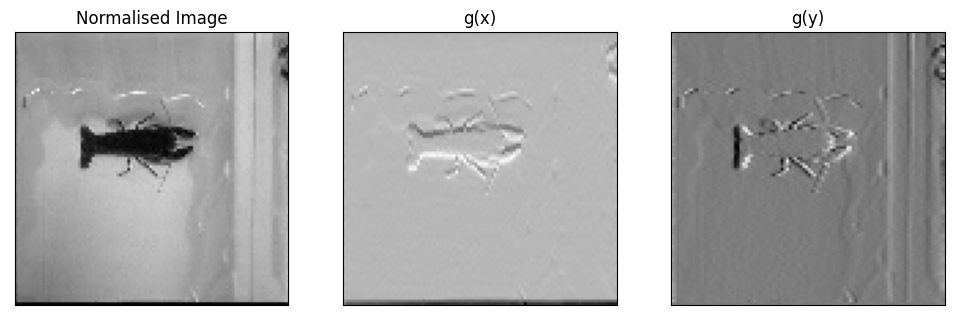

In [33]:
# HOG visualtation for report

hog_img = img_data[217]
hog_img_norm = cv2.cvtColor(hog_img, cv2.COLOR_RGB2GRAY)
grads = np.gradient(hog_img_norm)
fig, ax_arr = plt.subplots(1, 3, figsize= (12, 4))

labels = ["g(x)", "g(y)"]
savenames = ["gx.tiff", "gy.tiff"]

ax_arr[0].imshow(hog_img_norm, cmap='gray')
ax_arr[0].axes.get_yaxis().set_visible(False)
ax_arr[0].axes.get_xaxis().set_visible(False)
ax_arr[0].set_title('Normalised Image')
for a in range(len(ax_arr)-1):
    grads[a] += np.abs(np.min(grads[a]))
    grads[a] /= np.max(grads[a])
    ax_arr[a+1].imshow(grads[a], cmap='gray')
    ax_arr[a+1].set_title(labels[a])
    ax_arr[a+1].axes.get_yaxis().set_visible(False)
    ax_arr[a+1].axes.get_xaxis().set_visible(False)
fig.show



In [34]:
hog_img = img_data[12]
hog_img_norm2 = cv2.cvtColor(hog_img, cv2.COLOR_RGB2GRAY)


<bound method Figure.show of <Figure size 1400x400 with 4 Axes>>

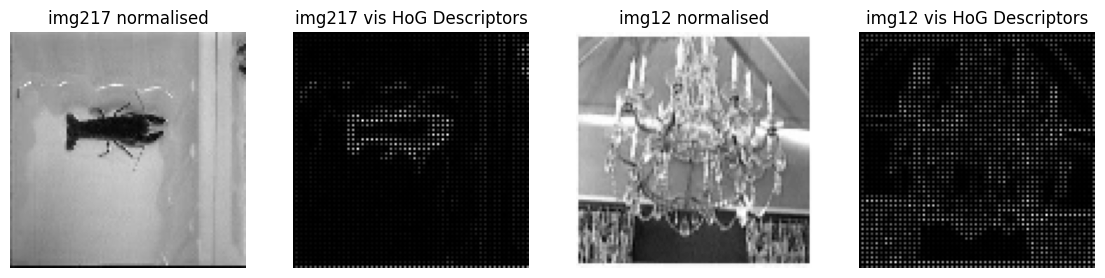

In [35]:
from skimage.feature import hog
feats, hog_img1 = hog(hog_img_norm, orientations=8, pixels_per_cell=(
    2, 2), cells_per_block=(1, 1),  visualize=True)

feats, hog_img2 = hog(hog_img_norm2, orientations=8, pixels_per_cell=(
    2, 2), cells_per_block=(1, 1),  visualize=True)



fig, ax_arr = plt.subplots(1, 4, figsize=(14, 4))
ax_arr[0].imshow(hog_img_norm, cmap='gray')
ax_arr[0].set_title('img217 normalised')
ax_arr[0].axis('off')

ax_arr[1].imshow(hog_img1, cmap='gray')
ax_arr[1].set_title('img217 vis HoG Descriptors')
ax_arr[1].axis('off')

ax_arr[2].imshow(hog_img_norm2, cmap='gray')
ax_arr[2].set_title('img12 normalised')
ax_arr[2].axis('off')

ax_arr[3].imshow(hog_img2, cmap='gray')
ax_arr[3].set_title('img12 vis HoG Descriptors')
ax_arr[3].axis('off')

fig.show


# Global Functions

In [36]:
def normalise(distances, scale):
    scaler = MinMaxScaler((0, scale))
    keys = distances.keys()
    distances = np.array(list(distances.values()))
    distances = scaler.fit_transform(distances.reshape(-1, 1))
    distances = dict(zip(keys, distances))
    return distances

# Histogram features

In [37]:
def histogram_features(img):
    features = [] 
    pp_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    channels = cv2.split(pp_img)
    channel_names = ('h', 's', 'v')
    for (channel, channel_name) in zip(channels, channel_names):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        features.extend(hist.flatten())
        return features

In [38]:
def hist_features_database(data_imgs):
    db_features = []
    for img in data_imgs:
        db_features.append(histogram_features(img))
    db_hist_df = DataFrame(db_features)
    return db_hist_df

In [39]:
def calc_hist_distance(query_img, db_df):
    feature_vectors = db_df.values.tolist()
    distances = {}
    for a in range(len(feature_vectors)):
        query_features = histogram_features(query_img)
        dist = euclidean(query_features, feature_vectors[a])
        distances[a] = dist
    return normalise(distances, 20)

In [40]:
test_hist = hist_features_database(img_data)


# Gabor Features

In [41]:
def build_filters():
    filters = []
    kernal_size = 9
    for theta in np.arange(0.0001, np.pi, np.pi / 8):
        for deg in np.arange(0.0001, 6*np.pi/4, np.pi / 4):
            kernal = cv2.getGaborKernel((kernal_size, kernal_size), 1.0, theta, deg, 0.5, 0, ktype= cv2.CV_32F)
            kernal /= 1.5 * kernal.sum()
            filters.append(kernal)
    return filters

In [42]:
filter_test = build_filters()

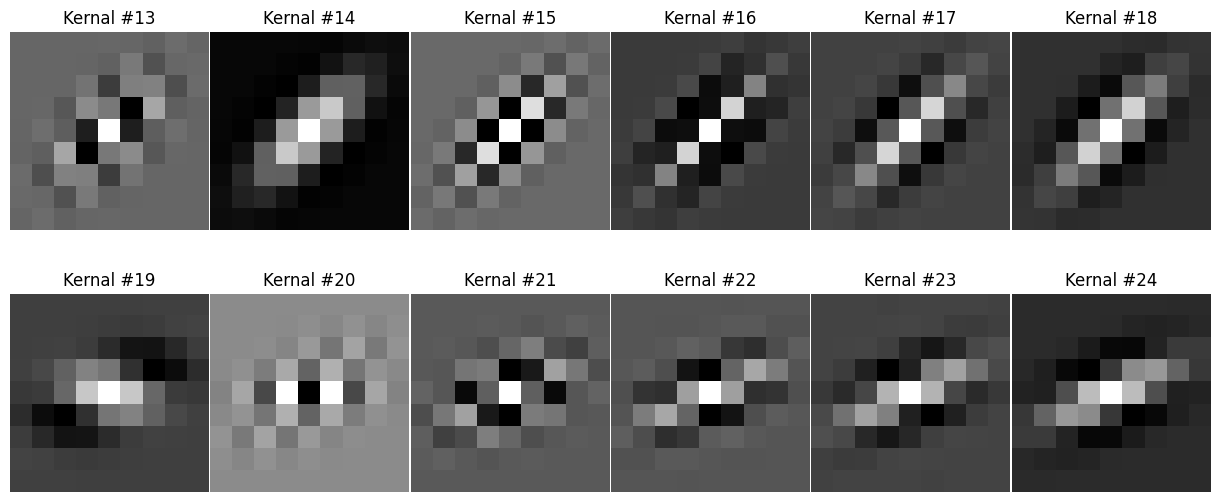

In [43]:
# gabor filter visulisation
plot_num = 4
filter_n = 12
fig, ax = plt.subplots(2, 6, figsize=(12, 5))
fig.subplots_adjust(hspace=0.10, wspace=0.01, left=0, right=1, bottom=0, top=1)

for n in range(2):
    for a in range(6):
        ax[n][a].imshow(filter_test[filter_n], cmap='gray')
        ax[n][a].axis('off')
        ax[n][a].set_title("Kernal #{}".format(filter_n+1))
        filter_n += 1


In [44]:
def convolve_filters(img, filters):
    conv = np.zeros_like(img)
    for kernal in filters:
        filter_img = cv2.filter2D(img, cv2.CV_8UC3, kernal)
        np.maximum(conv, filter_img, conv)
    return conv

In [45]:
def gabor_features(img):
    features = []
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    filters = np.asarray(build_filters())
    
    for a in range(20):
        energy = 0
        conv = convolve_filters(img, filters[a])
        for b in range(img.shape[0]):
            for c in range(img.shape[1]):
                energy += conv[b][c] * conv[b][c]
        features.append(energy)
    for a in range(20):
        mean = 0
        conv = convolve_filters(img, filters[a])
        for b in range(img.shape[0]):
            for c in range(img.shape[1]):
                mean += abs(conv[a][b])
        features.append(mean)
    features = np.array(features)
    return features

In [46]:
def gabor_features_database(data_imgs):
    db_feat = []
    for img in data_imgs:
        db_feat.append(gabor_features(img))
    db_gabor_df = DataFrame(db_feat)
    return db_gabor_df

In [47]:
def calc_gabor_distance(query_img, db_df):
    distances = {}
    query_feat = gabor_features(query_img)
    feature_vector = db_df.values.tolist()
    
    for a in range(len(feature_vector)):
        distances[a] = euclidean(query_feat, feature_vector[a])
    distances = normalise(distances, 20)
    return distances

# Haralick Feature Testing

In [48]:
def haralick_features(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    texture = mt.features.haralick(img)
    features = texture.mean(axis=0)
    return features

In [49]:
def haralick_features_database(img_db):
    features = []
    for img in img_db:
        feat = haralick_features(img)
        features.append(feat)
    haralick_df = DataFrame(features)
    return haralick_df


In [50]:
def calc_haralick_distance(query_img, db_df):
    distances = {}
    query_feat = haralick_features(query_img)
    haralick_fv = db_df.values.tolist()
    for a in range(len(haralick_fv)):
        img_feats = haralick_fv[a]
        dist = euclidean(query_feat, img_feats)
        distances[a] = dist
    distances = normalise(distances, 20)
    return distances

# Distance Metric Calculation

In [51]:
def calc_distances_total(hist_dist, gabor_dist):
    total_dist = []
    hist_weight = 0.8
    gabor_weight = 0.2
    
    for a in hist_dist:
        hist_dist[a] *= hist_weight
        gabor_dist[a] *= gabor_weight
        total_dist.append(hist_dist[a] + gabor_dist[a])  
    return sorted(dict(zip(np.arange(0, len(img_data)), (np.array(total_dist)))).items(), key=operator.itemgetter(1))


In [52]:
query_img = img_data[0]

hist_dist = calc_hist_distance(query_img, hist_features_database(img_data))
gabor_dist = calc_gabor_distance(query_img, gabor_features_database(img_data))

final_dist = calc_distances_total(hist_dist, gabor_dist)

C:\Users\Joe\AppData\Local\Temp\ipykernel_4860\1077438191.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  energy += conv[b][c] * conv[b][c]


# Model 2 Testing

# HOG

In [53]:
import skimage
from skimage.feature import hog

In [54]:
def HOG_features(img, bin_n, norm):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    fd = hog(img, orientations=8, pixels_per_cell=(2,2), cells_per_block=(1,1))
    b = np.linspace(0, np.max(fd), bin_n+1)
    histogram, _ = np.histogram(fd, bins=b)
    
    if norm:
        histogram = (histogram - histogram.mean()) / (histogram.std())
    
    return histogram

In [55]:
def HOG_hist(img, type_h, bin_n, slice_n, norm):
    
    if type_h == 'global':
        histogram = HOG_features(img, bin_n, norm)
        
    elif type_h == 'reigon':
        histogram = np.zeros((slice_n, slice_n, bin_n))
        slice_h = np.around(np.linspace(0, img.shape[0], slice_n +1)).astype(int)
        slice_w = np.around(np.linspace(0, img.shape[1], slice_n + 1)).astype(int)
        
        for h in range(len(slice_h)-1):
            for w in range(len(slice_w)-1):
                #create reigons for image
                reigon = img[slice_h[h]:slice_h[h+1], slice_w[w]: slice_w[w+1]]
                histogram[h][w] = HOG_features(reigon, bin_n, norm)
            
    return histogram.flatten()


In [56]:
def HOG_db_feats(img_db, type_h, bin_n, slice_n, norm):
    db_features = []
    for img in img_db:
        db_features.append(HOG_hist(img, type_h, bin_n, slice_n, norm))
    db_df = DataFrame(db_features)
    return db_df

# Colour Features 2.0

In [57]:
import itertools
import imageio.v3 as iio


In [58]:
def colour_features2(img):
    feats = []
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    channels = cv2.split(img)
    channel_n = ('h', 's', 'v')
    for (channel, channel_n) in zip(channels, channel_n):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        feats.extend(hist)
    return feats
    

In [59]:
def colour_hist(img, type_h, bin_n, slice_n, norm):
    bins = np.linspace(0, 256, bin_n+1, endpoint=True)
    if type_h == 'global':
        histogram = colour_features2(img)
        
    elif type_h == 'reigon':
        histogram = np.zeros((slice_n, slice_n, 256 * img.shape[2]))
        slice_h = np.around(np.linspace(
            0, img.shape[0], slice_n + 1)).astype(int)
        slice_w = np.around(np.linspace(
            0, img.shape[1], slice_n + 1)).astype(int)
        
        for h in range(len(slice_h)-1):
            for w in range(len(slice_w)-1):
                #create reigons for image
                reigon = img[slice_h[h]:slice_h[h+1], slice_w[w]: slice_w[w+1]]
                histogram[h][w] = colour_features2(reigon)
                
        if norm:
            histogram = (histogram - histogram.mean()) / (histogram.std())
        
    return np.array(histogram)


In [60]:
def colour_db_feats(img_db, type_h, bin_n, slice_n, norm):
    db_features = []
    for img in img_db:
        db_features.append(colour_hist(img, type_h, bin_n, slice_n, norm))
    db_hist_df = DataFrame(db_features)
    return db_hist_df

# Gabor Feats 2.0

In [61]:
# gab imports
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import math

In [62]:
# create kernals at different orientations
def build_gabor_kernals(theta, freq, sigma):
    kern_l = []
    for t in range(theta):
        t = t / float(theta) * np.pi
        for f in freq:
                for s in sigma:
                    kern = gabor_kernel(f, theta = t, sigma_x=s, sigma_y=s)
                    kern_l.append(kern)
    return kern_l

In [63]:
def convolve_filters2(img, kern):
    
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    conv = np.sqrt(ndi.convolve(img, np.real(kern), mode='wrap')**2 +
        ndi.convolve(img, np.imag(kern), mode = 'wrap')**2)
    
    features = np.zeros(2, dtype = np.double)
    features[0] = conv.mean()
    features[1] = conv.var()
    return features

In [64]:
def gabor_features2(img, g_kernals, norm):
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    results = []
    
    for kern in g_kernals:
        results.append(convolve_filters2(g_img, kern))
    
    histogram = np.array(results)
    if norm:
        histogram = (histogram - histogram.mean()) / (histogram.std())
        
    return histogram.T.flatten()

In [65]:
def gabor(img, g_kernals, type_h, slice_n, norm):
    
    if type_h == 'global':
        histogram = gabor_features2(img, g_kernals, norm)
        
    elif type_h == 'reigon':
        histogram = np.zeros((slice_n, slice_n, len(g_kernals)*2))
        slice_h = np.around(np.linspace(
            0, img.shape[0], slice_n + 1)).astype(int)
        slice_w = np.around(np.linspace(
            0, img.shape[1], slice_n + 1)).astype(int)
        
        for h in range(len(slice_h)-1):
            for w in range(len(slice_w)-1):
                #create reigons for image
                reigon = img[slice_h[h]:slice_h[h+1], slice_w[w]: slice_w[w+1]]
                histogram[h][w] = gabor_features2(reigon, g_kernals, norm)
            
    return histogram.flatten()

In [66]:
def gabor_db_feats(img_db, g_kernals, type_h, slice_n, norm):
    db_features = []
    for img in img_db:
        db_features.append(gabor(img, g_kernals, type_h, slice_n, norm))
    db_df = DataFrame(db_features)
    return db_df

# DAISY features 

In [67]:
# import====
from skimage.feature import daisy

In [68]:
def daisy_features(img, step, radius, ring_n, hist_n, oriant_n, norm = True):
    g_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    R = (ring_n * hist_n + 1) * oriant_n
    desc = daisy(g_img, step = step, radius = radius, rings = ring_n,
                 histograms = hist_n, orientations = oriant_n)
    desc.reshape(-1, R)
    histogram = np.mean(desc, axis = 0)
    
    if norm:
        histogram = (histogram - histogram.mean()) / (histogram.std())
    return histogram


In [69]:
def daisy(img, type_h, slice_n, step, radius, ring_n, hist_n, oriant_n, norm):
    R = (ring_n * hist_n + 1) * oriant_n
    
    if type_h == 'global':
        histogram = daisy_features(img, step, radius, ring_n,
                                   hist_n, oriant_n, norm)
    elif type_h == 'reigon':
        histogram = np.zeros((slice_n, slice_n, R))
        slice_h = np.around(np.linspace(
            0, img.shape[0], slice_n + 1)).astype(int)
        slice_w = np.around(np.linspace(
            0, img.shape[1], slice_n + 1)).astype(int)
        
        for h in range(len(slice_h)-1):
            for w in range(len(slice_w)-1):
                #create reigons for image
                img_r = img[slice_h[h]:slice_h[h+1], slice_w[w]: slice_w[w+1]]
                histogram[h][w] = daisy_features(
                    img_r, step, radius, ring_n, hist_n, oriant_n, norm)
    
    if norm:
        histogram /= np.sum(histogram)
        
    return histogram


In [70]:
#test_daisy = daisy_features(img, 10, 30, 2, 6, 8)

In [71]:
#plt.imshow(daisy_img)


# Haralick 2 (similar to M1 implementation)

In [72]:
def haralick_features(img, norm):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    histogram = mt.features.haralick(img).mean(axis=0)
    if norm:
        histogram = np.array(histogram) / np.sum(histogram)
        
    return histogram


In [73]:
def haralick(img, type_h, slice_n, norm):
    if type_h == 'global':
        histogram = haralick_features(img, norm)
    
    elif type_h == 'reigon':
        histogram = np.zeros((slice_n, slice_n, 13))
        slice_h = np.around(np.linspace(
            0, img.shape[0], slice_n + 1)).astype(int)
        slice_w = np.around(np.linspace(
            0, img.shape[1], slice_n + 1)).astype(int)
        
        for h in range(len(slice_h)-1):
            for w in range(len(slice_w)-1):
                #create reigons for image
                img_r = img[slice_h[h]:slice_h[h+1], slice_w[w]: slice_w[w+1]]
                histogram[h][w] = haralick_features(img_r, norm)
        
        if norm:
            histogram = (histogram - histogram.mean()) / (histogram.std()) 

    return histogram.flatten()


In [74]:
def haralick_db_feats(img_db, type_h, slice_n, norm):
    db_features = []
    for img in img_db:
        db_features.append(haralick(img, type_h, slice_n, norm))
    db_df = DataFrame(db_features)
    return db_df

# M2 Feats

In [75]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


In [129]:
ds = img_data

type_h = 'reigon'
norm = False
slice_n = 2

scaler = MinMaxScaler()

#colour features
colour_f = colour_db_feats(ds, 'global', 12, 3, norm)
colour_f = scaler.fit_transform(colour_f)

#texture features
gabor_kernals = build_gabor_kernals(4, (0.1, 0.5, 0.8), (1, 3))
gab_f = gabor_db_feats(ds, gabor_kernals, type_h, slice_n, norm)
gab_f = scaler.fit_transform(gab_f)

hara_f = haralick_db_feats(ds, type_h, slice_n, norm)
hara_f = scaler.fit_transform(hara_f)

#shape features
hog_b = 10 # number of bins for each img
HOG_f = HOG_db_feats(ds, type_h, hog_b, slice_n, norm)
HOG_f = scaler.fit_transform(HOG_f)

In [130]:
# feature extraction for report
colour_f_r = []
gab_f_r = [] 
hara_f_r = []
HOG_f_r = []

for run in range(len(report_data)):
    type_h = 'reigon'
    norm = False
    slice_n = 2

    scaler = MinMaxScaler()

    #colour features
    colour_f = colour_db_feats(report_data[run], 'global', 12, 3, norm)
    colour_f = scaler.fit_transform(colour_f)
    colour_f_r.append(colour_f)

    #texture features
    gabor_kernals = build_gabor_kernals(4, (0.1, 0.5, 0.8), (1, 3))
    gab_f = gabor_db_feats(
        report_data[run], gabor_kernals, type_h, slice_n, norm)
    gab_f = scaler.fit_transform(gab_f)
    gab_f_r.append(gab_f)

    hara_f = haralick_db_feats(report_data[run], type_h, slice_n, norm)
    hara_f = scaler.fit_transform(hara_f)
    hara_f_r.append(hara_f)

    #shape features
    hog_b = 10  # number of bins for each img
    HOG_f = HOG_db_feats(report_data[run], type_h, hog_b, slice_n, norm)
    HOG_f = scaler.fit_transform(HOG_f)
    HOG_f_r.append(HOG_f)


In [78]:
print("Colour F Shape: {}".format(colour_f.shape))
print("Gab F Shape: {}".format(gab_f.shape))
print("Hara F Shape: {}".format(hara_f.shape))
print("HOG F Shape: {}".format(HOG_f.shape))

Colour F Shape: (644, 768)
Gab F Shape: (644, 192)
Hara F Shape: (644, 52)
HOG F Shape: (644, 40)


# Feature Fusion

In [131]:
# no clr
non_clr = []
for run in range(len(report_data)):
    no_clr = np.concatenate((gab_f_r[run], hara_f_r[run], HOG_f_r[run]), axis=1)
    non_clr.append(no_clr)

# no gab
non_gab = []
for run in range(len(report_data)):
    no_gab = np.concatenate(
        (colour_f_r[run], hara_f_r[run], HOG_f_r[run]), axis=1)
    non_gab.append(no_gab)

# no hara
non_hara = []
for run in range(len(report_data)):
    no_hara = np.concatenate(
        (colour_f_r[run], gab_f_r[run], HOG_f_r[run]), axis=1)
    non_hara.append(no_hara)
    
# no HOG
non_HOG = []
for run in range(len(report_data)):
    no_HOG = np.concatenate(
        (colour_f_r[run], gab_f_r[run], hara_f_r[run]), axis=1)
    non_HOG.append(no_HOG)

all_feats = []
for run in range(len(report_data)):
    all_feat = np.concatenate(
        (colour_f_r[run], gab_f_r[run], hara_f_r[run], HOG_f_r[run]), axis = 1)
    all_feats.append(all_feat)


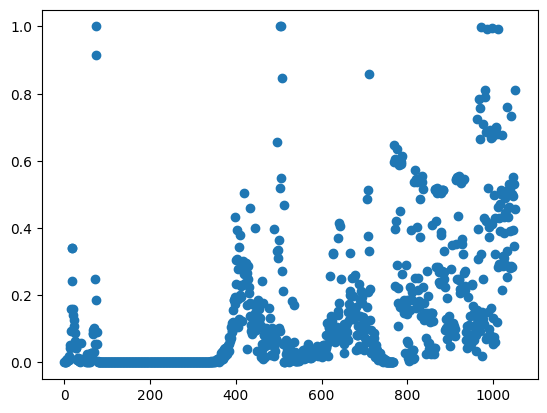

In [81]:
plt.scatter(np.arange(0, X_train.shape[1]), X_train[21])


# Image Classification Testing

In [82]:
from sklearn.cluster import KMeans

In [83]:
target_names = set(img_classes)

In [84]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [85]:
# evaluate model
def evaluate_model(model, train_x, train_y):
  # K fold resampling
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, train_x, train_y,
	                         scoring='f1_weighted', cv=cv, n_jobs=-1)
	return scores


In [21]:
model = LinearSVC(max_iter=5000,C=0.1, loss='squared_hinge',  tol=1e-5, random_state=0)
clr_scores = []
gab_scores = []
hara_scores = [] 
HOG_scores = [] 

for run in range(len(report_data)):
    clr_scores.append(np.mean(evaluate_model(model, non_clr[run], report_classes[run])))
    gab_scores.append(np.mean(evaluate_model(
        model, non_gab[run], report_classes[run])))
    hara_scores.append(np.mean(evaluate_model(
        model, non_hara[run], report_classes[run])))
    HOG_scores.append(np.mean(evaluate_model(
        model, non_HOG[run], report_classes[run])))

NameError: name 'evaluate_model' is not defined

In [ ]:
complete_scores = [] 
for run in range(len(report_data)):
    complete_scores.append(np.mean(evaluate_model(
        model, all_feats[run], report_classes[run])))
    
complete_scores.append(np.mean(complete_scores))


In [ ]:
clr_scores.append(np.mean(clr_scores))
gab_scores.append(np.mean(gab_scores))
hara_scores.append(np.mean(hara_scores))
HOG_scores.append(np.mean(HOG_scores))

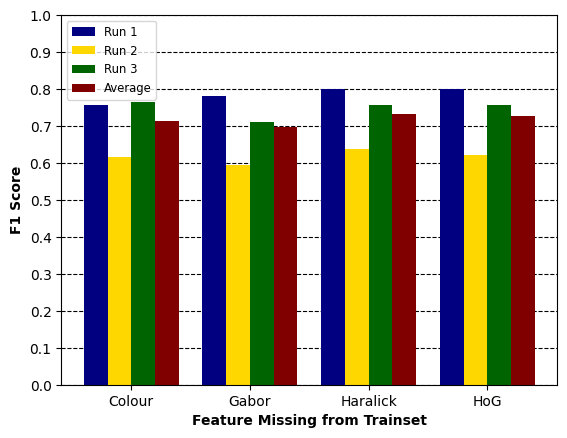

In [ ]:
x = np.arange(4)

width = 0.2

plt.bar(x-0.6, [clr_scores[0], gab_scores[0], hara_scores[0], HOG_scores[0]], width, color='navy', zorder=2.0)
plt.bar(x-0.4, [clr_scores[1], gab_scores[1],
        hara_scores[1], HOG_scores[1]], width, color='gold', zorder=2.0)
plt.bar(x-0.2, [clr_scores[2], gab_scores[2],
        hara_scores[2], HOG_scores[2]], width, color='darkgreen', zorder=2.0)
plt.bar(x, [clr_scores[3], gab_scores[3],
        hara_scores[3], HOG_scores[3]], width, color='maroon', zorder=2.0)
plt.grid(True, 'major', linestyle='--', color='k', axis='y', zorder=-1.0)
plt.xticks(x-0.3, ['Colour', 'Gabor', 'Haralick', 'HoG'])
plt.yticks(np.arange(0,1.1, 0.1))
plt.ylabel("F1 Score", weight='bold')
plt.xlabel("Feature Missing from Trainset", weight= 'bold')
plt.legend(["Run 1", "Run 2", "Run 3", "Average"], loc = 'upper left', fontsize = 'small')



In [180]:
def get_models():
    models = dict()
    models['Naive Bayes'] = GaussianNB()
    models['Logistic Regression'] = LogisticRegression()
    models['K-Nearest Neighbors'] = KNeighborsClassifier()
    models['Linear Support Vector Machine'] = LinearSVC()
    return models

models = get_models()
results, modelName = list(), list()
for name, model in models.items():
  for run in range(len(report_data)):
      scores = evaluate_model(model, all_feats[run], report_classes[run])
      results.append(scores)
      modelName.append(name)


In [181]:
# calcuate mean results for 3 run of 4 models
LR_results = []
SVM_results, NB_results, KM_results = [], [], []
for b in range(len(results[0])):
    NB_results.append(np.mean([results[0][b], results[1][b], results[2][b]]))
    LR_results.append(np.mean([results[3][b], results[4][b], results[5][b]]))
    KM_results.append(np.mean([results[6][b], results[7][b], results[8][b]]))
    SVM_results.append(np.mean([results[9][b], results[10][b], results[11][b]]))

results = [NB_results, LR_results, KM_results, SVM_results]
modelName = ['Naive Bayes', 'Logistic Regression',
             'K-Nearest Neighbors', 'Linear Support Vector Machine']


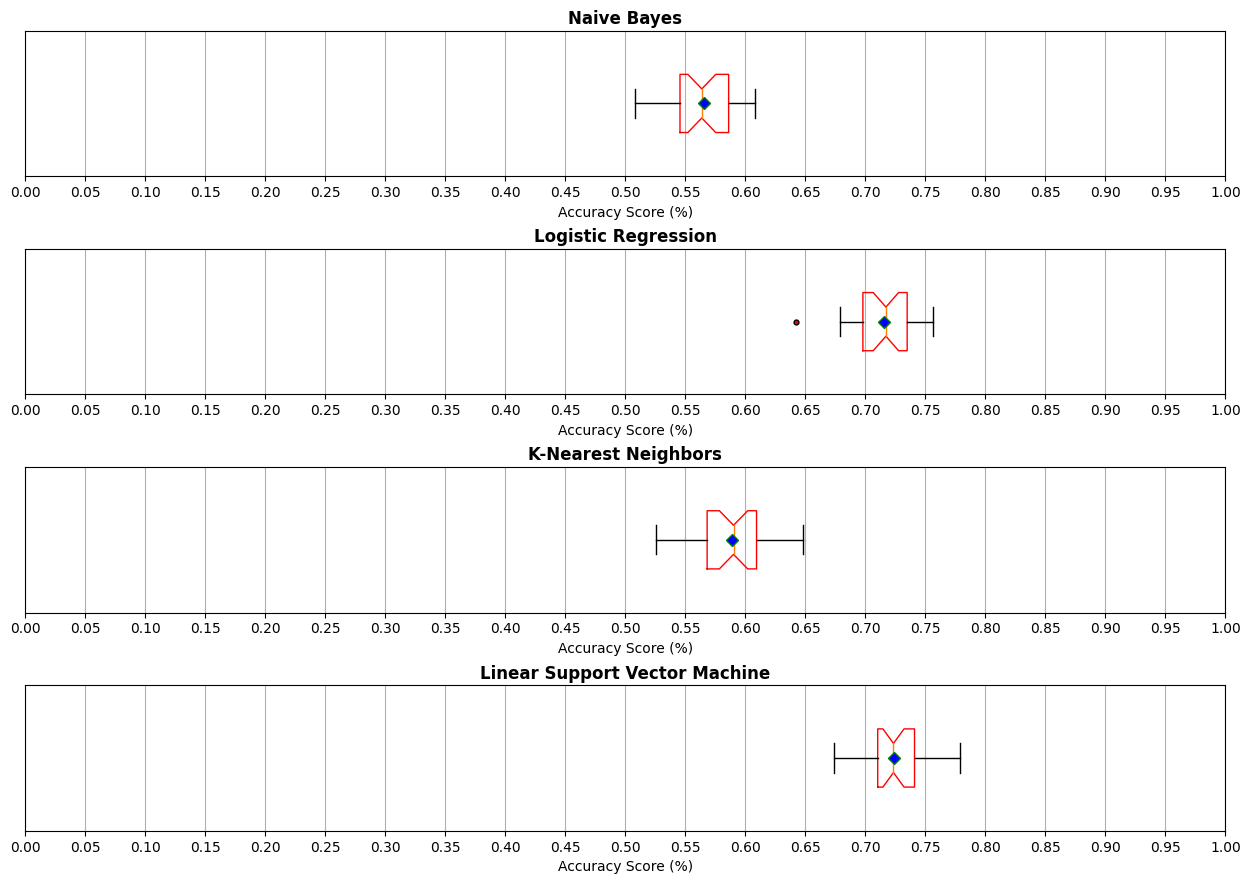

In [182]:
# create boxplots for comaprision
#set x ticks
xticks = np.arange(0.0, 1.05, 0.05, dtype=float)

#create markers
red_circle = dict(markerfacecolor='red', marker='.', markersize=7)
mean_shape = dict(markerfacecolor='blue', marker='D', markeredgecolor='green')

#create subplots
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.50, wspace=0.01, left=0, right=1, bottom=0, top=1)

#plot boxplot for each model
for a in range(len(ax)):
    ax[a].boxplot(results[a], boxprops=dict(color='red'), vert=False, flierprops=red_circle,
                  showmeans=True, meanprops=mean_shape, notch=True, widths=0.4)
    ax[a].set_xticks(xticks)
    ax[a].xaxis.grid(True)
    ax[a].get_yaxis().set_visible(False)
    ax[a].set_title(f"{modelName[a]}", fontsize=12,
                    y=0.99, fontweight='bold')
    ax[a].set_xlabel('Accuracy Score (%)')


# LR hyperparam tuning

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [75]:
# define the model
model = Pipeline([
    ('clf', LogisticRegression(max_iter=5000))
])
# hyperparam space
parameters = {
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.001, 0.01, 0.3593813663804626, 0.1, 1, 10, 100]
}

hog_clr

In [103]:
# retrain with optimal params
clf = LogisticRegression(C=100, max_iter=5000, solver= 'lbfgs')
clf.fit(gab_hog_train, Y_train)
Y_train_pred = clf.predict(gab_hog_train)
Y_test_pred = clf.predict(gab_hog_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names, digits=4)}')


Test:
              precision    recall  f1-score   support

      buddha     0.7121    1.0000    0.8319        47
         emu     0.4444    0.3810    0.4103        21
        crab     0.7692    0.5882    0.6667        17
    revolver     0.5789    0.6471    0.6111        17
       pizza     0.7200    0.6429    0.6792        28
   sunflower     1.0000    0.2308    0.3750        13
   saxophone     0.6087    0.5833    0.5957        24

    accuracy                         0.6647       167
   macro avg     0.6905    0.5819    0.5957       167
weighted avg     0.6796    0.6647    0.6445       167



gab_clr

In [ ]:
results = grid.fit(gab_clr_train, Y_train)
print(f'Best accuracy score: {results.best_score_}')
print(f'Best parameters: {results.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START clf__C=0.0001..............................................
[CV 1/5; 1/10] END ...............clf__C=0.0001;, score=0.163 total time=   0.0s
[CV 2/5; 1/10] START clf__C=0.0001..............................................
[CV 2/5; 1/10] END ...............clf__C=0.0001;, score=0.163 total time=   0.0s
[CV 3/5; 1/10] START clf__C=0.0001..............................................
[CV 3/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 4/5; 1/10] START clf__C=0.0001..............................................
[CV 4/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 5/5; 1/10] START clf__C=0.0001..............................................
[CV 5/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 1/5; 2/10] START clf__C=0.000774263682681127................................
[CV 1/5; 2/10] END .clf__C=0.000774263682681127;

In [105]:
# retrain with optimal params
clf = LogisticRegression(C=100, max_iter=5000, solver='lbfgs')
clf.fit(gab_clr_train, Y_train)
Y_train_pred = clf.predict(gab_clr_train)
Y_test_pred = clf.predict(gab_clr_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names, digits = 4)}')

Test:
              precision    recall  f1-score   support

      buddha     0.7705    1.0000    0.8704        47
         emu     0.4000    0.4762    0.4348        21
        crab     0.6667    0.4706    0.5517        17
    revolver     0.6000    0.3529    0.4444        17
       pizza     0.8636    0.6786    0.7600        28
   sunflower     0.6250    0.3846    0.4762        13
   saxophone     0.7241    0.8750    0.7925        24

    accuracy                         0.6946       167
   macro avg     0.6643    0.6054    0.6186       167
weighted avg     0.6936    0.6946    0.6794       167



gab_hog

In [ ]:
results = grid.fit(gab_hog_train, Y_train)
print(f'Best accuracy score: {results.best_score_}')
print(f'Best parameters: {results.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START clf__C=0.0001..............................................
[CV 1/5; 1/10] END ...............clf__C=0.0001;, score=0.163 total time=   0.0s
[CV 2/5; 1/10] START clf__C=0.0001..............................................
[CV 2/5; 1/10] END ...............clf__C=0.0001;, score=0.163 total time=   0.0s
[CV 3/5; 1/10] START clf__C=0.0001..............................................
[CV 3/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 4/5; 1/10] START clf__C=0.0001..............................................
[CV 4/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 5/5; 1/10] START clf__C=0.0001..............................................
[CV 5/5; 1/10] END ...............clf__C=0.0001;, score=0.154 total time=   0.0s
[CV 1/5; 2/10] START clf__C=0.000774263682681127................................
[CV 1/5; 2/10] END .clf__C=0.000774263682681127;

In [109]:
# retrain with optimal params
clf = LogisticRegression(C=100, max_iter=5000, solver='lbfgs')
clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names,digits=4)}')


Test:
              precision    recall  f1-score   support

      buddha     0.7966    1.0000    0.8868        47
         emu     0.4231    0.5238    0.4681        21
        crab     1.0000    0.4706    0.6400        17
    revolver     0.4118    0.4118    0.4118        17
       pizza     0.8696    0.7143    0.7843        28
   sunflower     0.6000    0.2308    0.3333        13
   saxophone     0.7241    0.8750    0.7925        24

    accuracy                         0.7006       167
   macro avg     0.6893    0.6037    0.6167       167
weighted avg     0.7177    0.7006    0.6868       167



clr_gab_har_hog

In [ ]:
grid = GridSearchCV(model, parameters, scoring="accuracy", cv=5, verbose=10)
results = grid.fit(X_train, Y_train)
print(f'Best accuracy score: {results.best_score_}')
print(f'Best parameters: {results.best_params_}')

In [ ]:
LR_results = DataFrame(results.cv_results_)
LR_results.sort_values('mean_test_score', ascending=False)

In [109]:
def LR_hyperParams():
    models = dict()
    models['LR - C = 100, solver = lbfgs'] = LogisticRegression(
        max_iter=5000, C=100, solver='lbfgs')
    models['LR - C = 0.01, solver = liblinear'] = LogisticRegression(
        max_iter=5000, C=0.01, solver='liblinear')
    models['LR - C = 0.359, solver = sag'] = LogisticRegression(
        max_iter=5000, C=0.359381, solver='sag')
    models['LR - C = 10, solver = saga'] = LogisticRegression(
        max_iter=5000, C=10, solver='saga')
    return models

LR_models = LR_hyperParams()

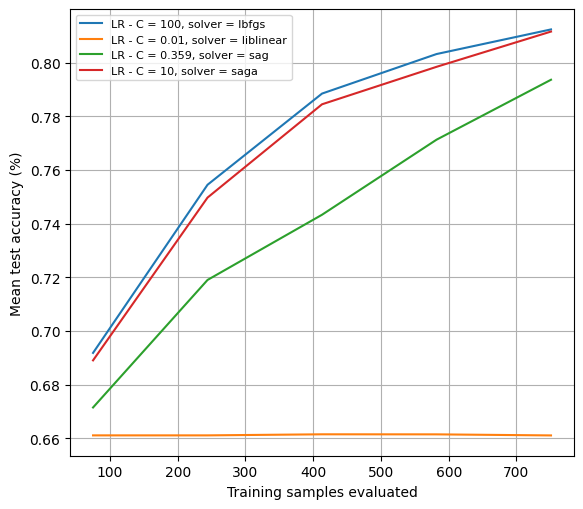

In [110]:
for modelName, model in LR_models.items():
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train, Y_train, cv=cv)
    testMean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes_abs, testMean, label=modelName)
plt.rcParams["figure.figsize"] = (6.5, 5.8)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.xlabel('Training samples evaluated')
plt.ylabel('Mean test accuracy (%)')
plt.show()


In [103]:
# retrain with optimal params
clf = LogisticRegression(C=2.782559402207126, max_iter=5000)
clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names)}')


Test:
              precision    recall  f1-score   support

    umbrella       0.22      0.33      0.27        12
        tick       0.56      0.36      0.44        25
      pagoda       0.84      0.95      0.89        40
      barrel       0.92      0.79      0.85        28
    crayfish       1.00      1.00      1.00        10
       ferry       0.62      0.59      0.61        17
     menorah       0.62      0.71      0.67        21

    accuracy                           0.71       153
   macro avg       0.69      0.68      0.67       153
weighted avg       0.72      0.71      0.71       153



# SVM hyperparam tuning

In [104]:
#define model
model = Pipeline([
    ('clf', LinearSVC(max_iter=5000, tol=1e-5))
])
#hyperparam space
parameters = {
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__C': [0.1, 1.0, 10, 100, 1000],
    'clf__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, parameters, scoring="accuracy", cv=5, verbose=10)


In [ ]:
results = grid.fit(hog_clr_train, Y_train)
pd_results = DataFrame(results.cv_results_)


print(f'Best accuracy score: {results.best_score_}')
print(f'Best parameters: {results.best_params_}')


In [107]:
pd_results.sort_values('mean_test_score', ascending=False).head(n=1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__loss,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.481784,0.018498,0.0013,0.000245,0.1,squared_hinge,l2,"{'clf__C': 0.1, 'clf__loss': 'squared_hinge', ...",0.718563,0.730539,0.748503,0.730539,0.748503,0.735329,0.011611,1


In [90]:
def SVM_hyperParams():
    models = dict()
    models['SVM - C = 1, loss = squared_hinge'] = LinearSVC(
        tol=1e-5, random_state=0)
    models['SVM - C = 0.1, loss = squared_hinge'] = LinearSVC(max_iter=5000,
                                                              C=0.1, loss='squared_hinge',  tol=1e-5, random_state=0)
    models['SVM - C = 10, loss = hinge'] = LinearSVC(
        max_iter=5000, C=10, loss='hinge', tol=1e-5, random_state=0)
    models['SVM - C = 1000, loss = squared_hinge'] = LinearSVC(max_iter=5000,
        C=1000, loss='squared_hinge', tol=1e-5, random_state=0)
    return models

SVM_models = SVM_hyperParams()

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\s

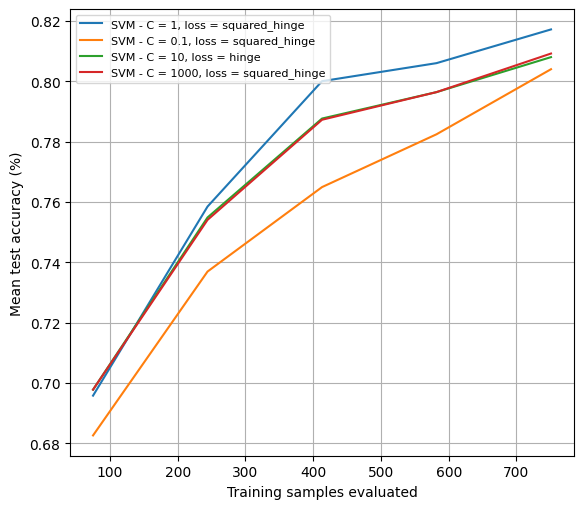

In [87]:
for modelName, model in SVM_models.items():
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train, Y_train, cv=cv)
    testMean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes_abs, testMean, label=modelName)
plt.rcParams["figure.figsize"] = (6.5, 5.8)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.xlabel('Training samples evaluated')
plt.ylabel('Mean test accuracy (%)')
plt.show()


In [ ]:
# retrain with optimal params
clf = LinearSVC(C=0.1, loss='squared_hinge',
                max_iter=5000, tol=1e-5, random_state=0)
clf.fit(hog_clr_train, Y_train)
Y_test_pred = clf.predict(hog_clr_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names)}')

Test:
               precision    recall  f1-score   support

    dragonfly       0.71      1.00      0.83        20
      dolphin       0.33      0.20      0.25        10
flamingo_head       0.71      0.48      0.57        25
         bass       0.20      0.31      0.24        13
     starfish       1.00      0.43      0.61        23
       mayfly       0.50      0.64      0.56        28
        lotus       0.41      0.69      0.51        13
    hawksbill       0.67      0.33      0.44        12
     umbrella       0.55      0.36      0.44        33
    accordion       0.40      0.60      0.48        20

     accuracy                           0.52       197
    macro avg       0.55      0.51      0.49       197
 weighted avg       0.58      0.52      0.52       197



In [ ]:
clf = LinearSVC(C=0.1, loss='squared_hinge',
                max_iter=5000, tol=1e-5, random_state=0)
clf.fit(gab_clr_train, Y_train)
Y_test_pred = clf.predict(gab_clr_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names)}')


Test:
               precision    recall  f1-score   support

    dragonfly       0.83      1.00      0.91        20
      dolphin       0.62      0.50      0.56        10
flamingo_head       0.65      0.52      0.58        25
         bass       0.44      0.62      0.52        13
     starfish       0.92      0.52      0.67        23
       mayfly       0.59      0.68      0.63        28
        lotus       0.48      0.77      0.59        13
    hawksbill       0.50      0.33      0.40        12
     umbrella       0.74      0.61      0.67        33
    accordion       0.58      0.75      0.65        20

     accuracy                           0.64       197
    macro avg       0.64      0.63      0.62       197
 weighted avg       0.66      0.64      0.64       197



In [ ]:
clf = LinearSVC(C=0.1, loss='squared_hinge',
                max_iter=5000, tol=1e-5, random_state=0)
clf.fit(gab_hog_train, Y_train)
Y_test_pred = clf.predict(gab_hog_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names)}')


Test:
               precision    recall  f1-score   support

    dragonfly       0.90      0.90      0.90        20
      dolphin       0.44      0.40      0.42        10
flamingo_head       0.44      0.28      0.34        25
         bass       0.45      0.77      0.57        13
     starfish       1.00      0.17      0.30        23
       mayfly       0.50      0.68      0.58        28
        lotus       0.31      0.62      0.41        13
    hawksbill       0.50      0.25      0.33        12
     umbrella       0.62      0.55      0.58        33
    accordion       0.59      0.80      0.68        20

     accuracy                           0.54       197
    macro avg       0.58      0.54      0.51       197
 weighted avg       0.60      0.54      0.52       197



In [ ]:
clf = LinearSVC(C=0.1, loss='squared_hinge',
                max_iter=5000, tol=1e-5, random_state=0)
clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
print(
    f'Test:\n{classification_report(Y_test, Y_test_pred, target_names=target_names)}')

Test:
               precision    recall  f1-score   support

    dragonfly       0.86      0.95      0.90        20
      dolphin       0.62      0.50      0.56        10
flamingo_head       0.64      0.56      0.60        25
         bass       0.40      0.62      0.48        13
     starfish       0.92      0.48      0.63        23
       mayfly       0.62      0.71      0.67        28
        lotus       0.48      0.77      0.59        13
    hawksbill       0.36      0.33      0.35        12
     umbrella       0.74      0.61      0.67        33
    accordion       0.68      0.75      0.71        20

     accuracy                           0.64       197
    macro avg       0.63      0.63      0.62       197
 weighted avg       0.67      0.64      0.64       197



# Optimised LR + SVM

In [190]:
def op_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression(
        C=40, max_iter=5000, solver= 'lbfgs')
    models['Linear Support Vector Machine'] = LinearSVC(C=0.1, loss='squared_hinge',
                                                        max_iter=5000)
    
    return models


models = op_models()
results, modelName = list(), list()
for name, model in models.items():
    for run in range(len(report_data)):
        scores = evaluate_model(model, all_feats[run], report_classes[run])
        results.append(scores)
        modelName.append(name)

In [191]:
# calcuate mean results for 3 run of 2 models
LR_results = []
SVM_results = []
for b in range(len(results[0])):
    LR_results.append(np.mean([results[0][b], results[1][b], results[2][b]]))
    SVM_results.append(np.mean([results[3][b], results[4][b], results[5][b]]))



Text(0.5, 0, 'F1 Score')

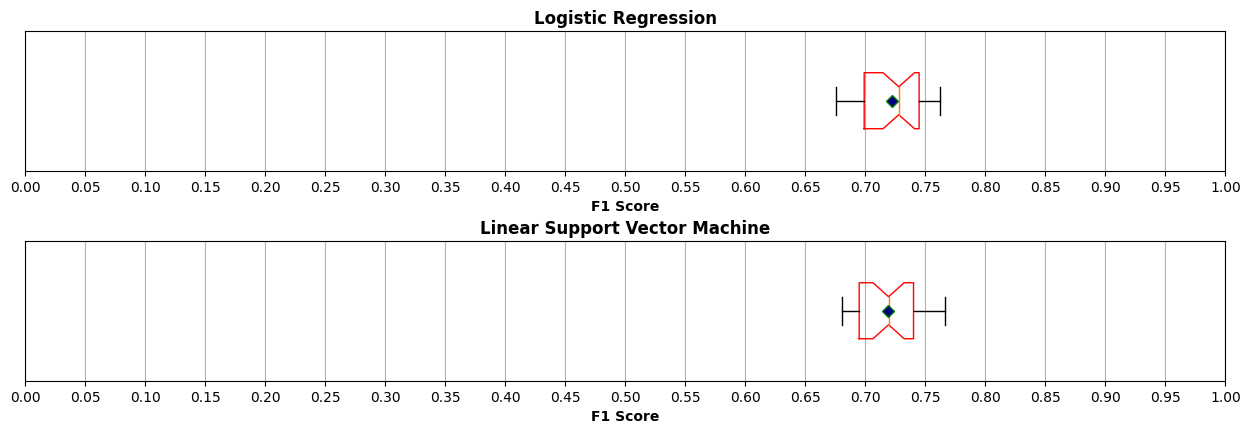

In [192]:
# create boxplots for comaprision
#set x ticks
xticks = np.arange(0.0, 1.05, 0.05, dtype=float)

#create markers
red_circle = dict(markerfacecolor='maroon', marker='.', markersize=7)
mean_shape = dict(markerfacecolor='navy', marker='D', markeredgecolor='green')

#create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 3.5))
fig.subplots_adjust(hspace=0.50, wspace=0.01, left=0, right=1, bottom=0, top=1)

#plot boxplot for each model
ax[0].boxplot(LR_results, boxprops=dict(color='red'), vert=False, flierprops=red_circle,
              showmeans=True, meanprops=mean_shape, notch=True, widths=0.4)
ax[0].set_xticks(xticks)
ax[0].xaxis.grid(True)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title(f"{modelName[0]}", fontsize=12,
                y=0.99, fontweight='bold')
ax[0].set_xlabel('F1 Score', weight='bold')

#plot boxplot for each model
ax[1].boxplot(SVM_results, boxprops=dict(color='red'), vert=False, flierprops=red_circle,
          showmeans=True, meanprops=mean_shape, notch=True, widths=0.4)
ax[1].set_xticks(xticks)
ax[1].xaxis.grid(True)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title(f"{modelName[4]}", fontsize=12,
                y=0.99, fontweight='bold')
ax[1].set_xlabel('F1 Score', weight='bold')


In [ ]:


colours = ['Maroon', 'Navy']
clr_num = 0 
for name, model in models.items():
    
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train, Y_train, cv=cv)
    testMean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes_abs, testMean, label = name, color = colours[clr_num])
    clr_num += 1
    
plt.rcParams["figure.figsize"] = (6.5, 5.8)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.xlabel('Training samples evaluated')
plt.ylabel('Mean test accuracy (%)')
plt.show()


In [158]:
DS_num = 2
clf = LinearSVC(C=0.1, loss='squared_hinge',
                max_iter=5000)
X_train, X_test, Y_train, Y_test = train_test_split(
    all_feats[DS_num], report_classes[DS_num], test_size=0.3)

clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)
print("SVM Accuracy Score = {}".format(
    accuracy_score(Y_test, predicted)))


SVM Accuracy Score = 0.684931506849315


# Test

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


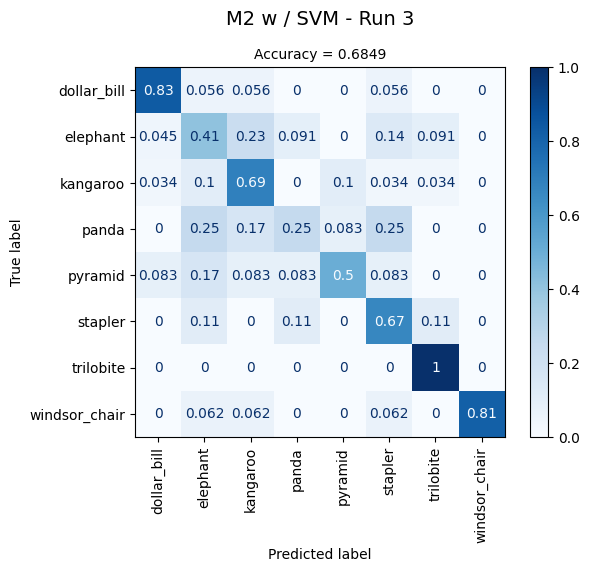

In [159]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, Y_test,
                               cmap=plt.cm.Blues,
                               normalize='true', xticks_rotation='vertical')
plt.title('Accuracy = {0:.4f}'.format(
    accuracy_score(Y_test, predicted)), fontsize=10)
plt.suptitle('M2 w / SVM - Run 3', fontsize=14, x=0.31, y=1, horizontalalignment='left', verticalalignment='top', )
plt.show(matrix)
plt.show()


In [185]:
from M3 import M3
DS_num = 2
M3_report = M3(report_data[DS_num])
M3_feats = M3_report.vgg_db_feats(report_data[DS_num])

1/1 [==============================] - 0s 58ms/step
db feats extracted


In [192]:
M3_report_model = M3_report.SVM_train(M3_feats, report_classes[DS_num])
X_train, X_test, y_train, y_test = train_test_split(M3_feats,
                                                    report_classes[DS_num],
                                                    test_size=0.30, random_state=42)
M3_report_model.fit(X_train, y_train)
predicted = M3_report_model.predict(X_test)
print("SVM Accuracy Score = {}".format(
    accuracy_score(y_test, predicted)))


SVM Accuracy Score = 0.9657534246575342
SVM Accuracy Score = 0.952054794520548


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


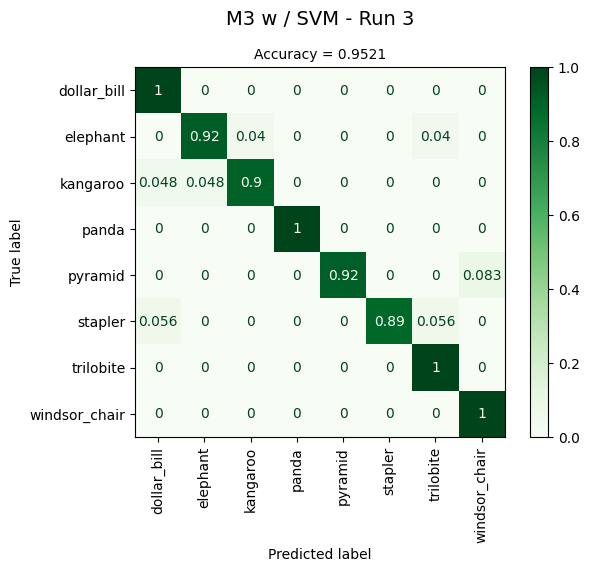

In [189]:
matrix = plot_confusion_matrix(M3_report_model, X_test, y_test,
                               cmap=plt.cm.Greens,
                               normalize='true', xticks_rotation='vertical')

plt.title('Accuracy = {0:.4f}'.format(
    accuracy_score(y_test, predicted)), fontsize=10)
plt.suptitle('M3 w / SVM - Run 3', fontsize=14, x=0.31, y=1,
             horizontalalignment='left', verticalalignment='top', )
plt.show(matrix)
plt.show()
